# Import Statements

In [71]:
import os
import librosa
import librosa.display
import scipy
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import IPython.display as ipd
from tqdm import tqdm_notebook as tqdm
import tensorflow as tf
import tensorflow.keras as keras
import warnings
warnings.filterwarnings('ignore')

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [ ]:
# def getFeeling(item):
#     if item[0]=='a':
#         return('angry')
#     elif item[0]=='f':
#         return('fear')
#     elif item[0]=='d':
#         return('disgust')
#     elif item[0]=='h':
#         return('happiness')
#     elif item[0]=='s' and item[1]=='a':
#         return('sadness')
#     elif item[0]=='s'and item[1]=='u':
#         return('surprise')
#     elif item[0]=='n':
#         return('neutral')

In [ ]:
# folderlist=os.listdir('Savee_Data')
# count=1
# y = []

# for foldername in tqdm(folderlist):
#     insidefolderlist = os.listdir('Savee_Data/'+foldername)
    
#     for name in tqdm(insidefolderlist):
#         # loading the file
#         amplitude_data, sampling_rate = librosa.load('Savee_Data/'+foldername+'/'+name,sr=None)

#         # Deciding number of features we want to extract
#         no_of_mfcc_features_to_extract = 20

#         # Taking the Gender and Feeling Information
#         gender = "male"
#         feeling = getFeeling(name)

#         # Extracting MFCC Features from File
#         mfcc= librosa.feature.mfcc(y=amplitude_data, n_mfcc=no_of_mfcc_features_to_extract)

#         # Making DataFrame of Features
#         mfcc_dataframe = pd.DataFrame(mfcc)

#         # Transposing the Data so we get features as columns and value per window as rows
#         mfcc_dataframe=mfcc_dataframe.T

#         # Adding Column Headings
#         mfcc_dataframe_columns=[]
#         for i in range(1,no_of_mfcc_features_to_extract+1):
#             mfcc_dataframe_columns.append("Feature "+str(i))

#         mfcc_dataframe.columns = mfcc_dataframe_columns

#         ## Saving the DataFrame to CSV
#         nameToSaveFileAs= "Data_2.0_/Data/"+gender+"_"+feeling+"_"+str(count)+"_.csv"
#         mfcc_dataframe.to_csv(nameToSaveFileAs,index=False)
        
#         count+=1
        
#         y.append(feeling)
        
        
# y_set = pd.DataFrame(y)
# y_set.to_csv("Data_2.0_/y_dataset.csv",index=False)

In [ ]:
# frame=[]
# newfolderlist=os.listdir('Script')

# for foldername in tqdm(newfolderlist):
#     insidefolderlist = os.listdir('Script/'+foldername)
#     for filename in insidefolderlist:
#         frame_df = pd.read_csv("Script/"+foldername+"/"+filename)
#         frame.append(frame_df)

# result=pd.concat(frame)

# result.to_csv("Script/Savee_Data.csv",index=False)    
    

In [ ]:
# folderlist = os.listdir('rawdata')
# feeling_list = []
# for foldername in tqdm(folderlist):
#     insidefolderlist = os.listdir('rawdata/' + foldername)
#     for name in tqdm(insidefolderlist):
#         if name[6:8] == '02' and int(name[18:20]) % 2 == 0:
#             feeling_list.append('female_calm')
#         elif name[6:8] == '02' and int(name[18:20]) % 2 == 1:
#             feeling_list.append('male_calm')
#         elif name[6:8] == '03' and int(name[18:20]) % 2 == 0:
#             feeling_list.append('female_happy')
#         elif name[6:8] == '03' and int(name[18:20]) % 2 == 1:
#             feeling_list.append('male_happy')
#         elif name[6:8] == '04' and int(name[18:20]) % 2 == 0:
#             feeling_list.append('female_sad')
#         elif name[6:8] == '04' and int(name[18:20]) % 2 == 1:
#             feeling_list.append('male_sad')
#         elif name[6:8] == '05' and int(name[18:20]) % 2 == 0:
#             feeling_list.append('female_angry')
#         elif name[6:8] == '05' and int(name[18:20]) % 2 == 1:
#             feeling_list.append('male_angry')
#         elif name[6:8] == '06' and int(name[18:20]) % 2 == 0:
#             feeling_list.append('female_fearful')
#         elif name[6:8] == '06' and int(name[18:20]) % 2 == 1:
#             feeling_list.append('male_fearful')
#         elif name[6:8] == '01' and int(name[18:20]) % 2 == 1:
#             feeling_list.append('male_neutral')
#         elif name[6:8] == '01' and int(name[18:20]) % 2 == 0:
#             feeling_list.append('female_neutral')
#         elif name[6:8] == '07' and int(name[18:20]) % 2 == 0:
#             feeling_list.append('female_disgust')
#         elif name[6:8] == '07' and int(name[18:20]) % 2 == 1:
#             feeling_list.append('male_disgust')
#         elif name[6:8] == '08' and int(name[18:20]) % 2 == 0:
#             feeling_list.append('female_surprise')
#         elif name[6:8] == '08' and int(name[18:20]) % 2 == 1:
#             feeling_list.append('male_surprise')
#         elif name[0] == 'a':
#             feeling_list.append('male_angry')
#         elif name[0] == 'f':
#             feeling_list.append('male_fearful')
#         elif name[0] == 'd':
#             feeling_list.append('male_disgust')
#         elif name[0] == 'h':
#             feeling_list.append('male_happy')
#         elif name[0:2] == 'sa':
#             feeling_list.append('male_sad')
#         elif name[0:2] == 'su':
#             feeling_list.append('male_surprise')
#         elif name[0] == 'n':
#             feeling_list.append('male_neutral')

In [ ]:
# labels= pd.DataFrame(feeling_list)

In [ ]:
# labels[0].value_counts()

In [8]:
# # loading the file
# amplitude_data, sampling_rate = librosa.load('test.wav', sr=None)

# # Deciding number of features we want to extract
# no_of_mfcc_features_to_extract = 20

# # Extracting MFCC Features from File
# mfcc = np.mean(librosa.feature.mfcc(y=amplitude_data,
#                                     n_mfcc=no_of_mfcc_features_to_extract),
#                axis=0)

# # Making DataFrame of Features
# mfcc_dataframe = pd.DataFrame(mfcc)
# mfcc_dataframe = mfcc_dataframe.T

In [9]:
# mfcc_dataframe

,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,223
0,-3.782526,-0.702599,0.541599,0.928125,1.062174,1.344323,1.628705,1.23509,0.752388,1.133664,...,-0.502188,-0.952537,-1.591831,-2.08497,-2.567871,-3.143407,-2.936717,-2.870069,-2.233413,-1.817386


# Model building Code

In [6]:
def getFeeling(name):
    if name[6:8] == '02' and int(name[18:20]) % 2 == 0:
            return('female_calm')
    elif name[6:8] == '02' and int(name[18:20]) % 2 == 1:
        return('male_calm')
    elif name[6:8] == '03' and int(name[18:20]) % 2 == 0:
        return('female_happy')
    elif name[6:8] == '03' and int(name[18:20]) % 2 == 1:
        return('male_happy')
    elif name[6:8] == '04' and int(name[18:20]) % 2 == 0:
        return('female_sad')
    elif name[6:8] == '04' and int(name[18:20]) % 2 == 1:
        return('male_sad')
    elif name[6:8] == '05' and int(name[18:20]) % 2 == 0:
        return('female_angry')
    elif name[6:8] == '05' and int(name[18:20]) % 2 == 1:
        return('male_angry')
    elif name[6:8] == '06' and int(name[18:20]) % 2 == 0:
        return('female_fearful')
    elif name[6:8] == '06' and int(name[18:20]) % 2 == 1:
        return('male_fearful')
    elif name[6:8] == '01' and int(name[18:20]) % 2 == 1:
        return('male_neutral')
    elif name[6:8] == '01' and int(name[18:20]) % 2 == 0:
        return('female_neutral')
    elif name[6:8] == '07' and int(name[18:20]) % 2 == 0:
        return('female_disgust')
    elif name[6:8] == '07' and int(name[18:20]) % 2 == 1:
        return('male_disgust')
    elif name[6:8] == '08' and int(name[18:20]) % 2 == 0:
        return('female_surprise')
    elif name[6:8] == '08' and int(name[18:20]) % 2 == 1:
        return('male_surprise')
    elif name[0] == 'a':
        return('male_angry')
    elif name[0] == 'f':
        return('male_fearful')
    elif name[0] == 'd':
        return('male_disgust')
    elif name[0] == 'h':
        return('male_happy')
    elif name[0:2] == 'sa':
        return('male_sad')
    elif name[0:2] == 'su':
        return('male_surprise')
    elif name[0] == 'n':
        return('male_neutral')

In [17]:
outsidefoldername = 'rawdata/'
folderlist = os.listdir(outsidefoldername)
count = 0
y = []
frame = []

for foldername in tqdm(folderlist):
    insidefolderlist = os.listdir(outsidefoldername + foldername)

    for name in insidefolderlist:
        # loading the file
        amplitude_data, sampling_rate = librosa.load(outsidefoldername + foldername + '/' + name,
                                                     sr=None,
                                                     offset=0.5,
                                                     duration=2.5)

        # Deciding number of features we want to extract
        no_of_mfcc_features_to_extract = 20

        # Taking the Gender and Feeling Information
        feeling = getFeeling(name)

        # Extracting MFCC Features from File
        mfcc = np.mean(librosa.feature.mfcc(
            y=amplitude_data, n_mfcc=no_of_mfcc_features_to_extract),
                       axis=0)

        # Making DataFrame of Features
        mfcc_dataframe = pd.DataFrame(mfcc)
        mfcc_dataframe = mfcc_dataframe.T
        frame.append(mfcc_dataframe)

        count += 1

        y.append(feeling)

y_set = pd.DataFrame(y)
print('dataframe made')
result = pd.concat(frame)
print('result frame made')
result.insert(0, 'Gender_Emotions', y_set)
result.fillna(0)
print('inserted the emotion column')
result.to_csv(outsidefoldername + "/dataset.csv", index=False)
print("done")


dataframe made
result frame made
inserted the emotion column
done


In [13]:
y_set[0].value_counts()

male_neutral       168
male_angry         156
male_fearful       156
male_sad           156
male_happy         156
male_disgust       156
male_surprise      156
female_happy        96
female_calm         96
female_sad          96
female_surprise     96
male_calm           96
female_fearful      96
female_disgust      96
female_angry        96
female_neutral      48
Name: 0, dtype: int64

In [19]:
result.tail()

,Gender_Emotions,0,1,2,3,4,5,6,7,8,...,225,226,227,228,229,230,231,232,233,234
0,male_neutral,-14.223826,-14.099627,-14.234334,-14.060709,-12.915462,-12.165483,-11.720156,-11.330676,-10.957716,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,male_neutral,-20.664396,-21.031811,-21.112217,-21.885082,-16.675028,-14.444989,-12.957108,-11.788363,-11.704437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,male_neutral,-13.481151,-13.812825,-15.142279,-14.947645,-15.161448,-16.306850,-17.830185,-18.416002,-18.919678,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,male_neutral,-15.782751,-15.930887,-16.297283,-16.967167,-16.571812,-16.418156,-16.045444,-16.855339,-16.053539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,male_neutral,-11.382070,-12.237925,-12.758761,-11.941561,-12.411150,-12.918373,-15.054459,-17.323393,-18.514542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
result.shape

(1920, 616)

In [23]:
newresult = sk.utils.shuffle(result)

In [24]:
newresult.head()

,Gender_Emotions,0,1,2,3,4,5,6,7,8,...,225,226,227,228,229,230,231,232,233,234
0,male_neutral,-40.409996,-40.409996,-40.409996,-40.409996,-40.409996,-40.409996,-40.409996,-40.409996,-40.409996,...,-26.832119,-26.884481,-26.963867,-27.962442,-28.965443,-30.011658,-29.572275,-29.212086,-29.586985,-30.291498
0,male_neutral,-35.846596,-33.980324,-33.547630,-33.024803,-33.986675,-34.948540,-33.706371,-31.824070,-31.310236,...,-28.426153,-26.943609,-26.809483,-28.089254,-28.141638,-28.411053,-28.805542,-29.004297,-30.869497,-31.899593
0,male_neutral,-32.949078,-33.342136,-33.083138,-31.816025,-32.567734,-32.152866,-31.879751,-31.291210,-31.320255,...,-34.445412,-36.730576,-36.772911,-36.772911,-35.775688,-35.693775,-35.803970,-36.055473,-36.120163,-36.772911
0,male_neutral,-39.764095,-39.764095,-39.764095,-39.300751,-38.760468,-38.820709,-38.415951,-38.456257,-38.278019,...,-27.440166,-27.519903,-28.310665,-28.877686,-29.325735,-30.804453,-32.354996,-30.905899,-30.566122,-30.599903
0,male_neutral,-22.863974,-23.194998,-24.410572,-24.074833,-23.447540,-23.281990,-23.335211,-20.996922,-19.012182,...,-23.887842,-23.571108,-23.283560,-23.554569,-24.509342,-24.752670,-25.122326,-24.957600,-25.225941,-26.325703


In [27]:
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(newresult, newresult[0], test_size=0.2, random_state=42)

In [28]:
x_train.head()

,Gender_Emotions,0,1,2,3,4,5,6,7,8,...,225,226,227,228,229,230,231,232,233,234
0,male_neutral,-31.492947,-31.695047,-29.146585,-27.741491,-28.911560,-29.562735,-29.630850,-30.121311,-30.822916,...,-20.970074,-21.576435,-21.798603,-22.449249,-23.218769,-25.094969,-26.019354,-26.693533,-26.810797,-26.667856
0,male_neutral,-45.327866,-45.327866,-45.327866,-45.327866,-45.327866,-45.327866,-45.327866,-45.327866,-45.327866,...,-33.694523,-32.955341,-32.857841,-34.164627,-38.625710,-38.872780,-38.258789,-39.965263,-40.895363,-42.237865
0,male_neutral,-10.169432,-11.714800,-13.470088,-13.450983,-13.047621,-12.509762,-11.954714,-11.618532,-11.935634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,male_neutral,-37.470291,-36.382912,-35.784195,-35.467293,-36.863331,-36.653648,-35.461193,-35.161343,-35.225517,...,-31.816051,-31.410076,-31.946136,-31.514730,-32.343685,-32.797756,-32.564758,-33.153023,-33.591484,-34.849621
0,male_neutral,-29.591909,-28.455311,-28.655111,-30.827173,-31.616684,-32.481155,-33.173687,-31.917124,-32.195915,...,-25.256174,-25.020420,-24.580929,-25.265350,-24.811041,-22.760426,-22.132359,-22.763706,-23.666214,-24.664223


In [29]:
y_train.head()

0   -31.492947
0   -45.327866
0   -10.169432
0   -37.470291
0   -29.591909
Name: 0, dtype: float32

In [54]:
xtrain = newresult.iloc[:1536,1:]
xtest = newresult.iloc[1536:,1:]

In [57]:
xtrain.shape

(1536, 235)

In [56]:
xtest.shape

(384, 235)

In [58]:
ytrain = newresult.iloc[:1536,:1]
ytest = newresult.iloc[1536:,:1]

In [59]:
ytrain.shape

(1536, 1)

In [60]:
ytest.shape

(384, 1)

In [61]:
ytrain.head()

,Gender_Emotions
0,male_neutral
0,male_neutral
0,male_neutral
0,male_neutral
0,male_neutral


In [62]:
ytest.head()

,Gender_Emotions
0,male_neutral
0,male_neutral
0,male_neutral
0,male_neutral
0,male_neutral


In [67]:
X_train = np.array(xtrain)
y_train = np.array(ytrain)
X_test = np.array(xtest)
y_test = np.array(ytest)

lb = sk.preprocessing.LabelEncoder()

y_train = keras.utils.to_categorical(lb.fit_transform(y_train))
y_test = keras.utils.to_categorical(lb.fit_transform(y_test))

done


In [68]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [79]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(235,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)

In [80]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 235, 256)          1536      
_________________________________________________________________
activation_10 (Activation)   (None, 235, 256)          0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 235, 128)          163968    
_________________________________________________________________
activation_11 (Activation)   (None, 235, 128)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 235, 128)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 29, 128)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 29, 128)          

In [104]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [105]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=700, validation_data=(x_testcnn, y_test))

ValueError: You are passing a target array of shape (1536, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.

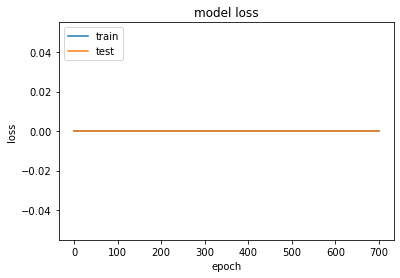

In [86]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [87]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\joshidhawal\Desktop\Projects\Final Year Project\Project\Initial Implementation\saved_models\Emotion_Voice_Detection_Model.h5 


In [88]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [90]:
# loading json and creating model
from tensorflow.keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
print("%s" % (loaded_model.metrics_names[1]))

Loaded model from disk
accuracy


In [91]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

384/384 [==============================] - 1s 2ms/sample


In [92]:
preds1=preds.argmax(axis=1)

In [93]:
preds1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [94]:
type(cnnhistory)

tensorflow.python.keras.callbacks.History

In [95]:
cnnhistory.history

{'loss': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0

In [101]:
cnnhistorydataframe = pd.DataFrame(cnnhistory.history)

In [102]:
cnnhistorydataframe.head()

,loss,accuracy,val_loss,val_accuracy
0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0


In [103]:
cnnhistorydataframe.to_csv('modelTrainingHistory.csv',index=False)